# Analysing homophily based on two different null models

**Author**: Andreas Kruff

**Version**: 20.04.2020

**Description**: To analyze the connectivity of a group of person (at a conference) for example, this package offers you the possibility to apply two different null models.

## Table of Contents
#### [Create network graphs from Data object](#network_from_data)
#### [Apply Configuration model on a network](#configuration_model)
#### [Plotting histogram for the null model](#histogram)
#### [Apply null model with randomized identities](#null_model)
#### [Plotting a heatmap from contact matrix](#plot_heatmap)

The cell below can be ignored, after being executed once. The path has to be set to the directory above to get access to the data and the functions of this libary.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from face2face.imports.load_all_data import Data

df = Data("WS16")

## Create network graphs from Data object 
<a name="network_from_data"></a>

If you want to analyse the connectivity of the people of the data set you have to create a networkx graph first. For that you can use the function "create_network_from_data". The needed input parameter for this function is an object from type "Data". If you want to replace string attributes into numeric attribute you can also set the replace_attr parameter "True".

In [3]:
from face2face.imports.create_network import create_network_from_data

network = create_network_from_data(df)

## Apply Configuration Model on a network
<a name="configuration_model"></a>

If you want to apply the Configuration model on the data set you can use the function "configuration_model_label_z_score_mixing_matrix" and you get the contact matrix with the z-scores.
The function requires five parameters. At first you need a networkx Graph and an object from type "Data". The more often you execute the function with the "runs" parameter, the better the result should be in the end. With the label parameter you can choose for which attribute you want to apply the null model. 
With the "shuffle_label" parameter you can extend the model by randomizing the peoples identities. The "force_simple_graph"-parameter allows us to delete self edges which occur when we use the "configuration_model" function from networkx.

There are two additional (optional) input parameter "seed_config_mat" and "seed_label". You can use them if you need fixed results from this function. The input parameters have to be lists with an integer for every run you want to apply.

In [14]:
from face2face.statistics.null_modell import configuration_model_label_z_score_mixing_matrix

contact_matrix, matrices , data_mixing_matrix, abs_matrices = configuration_model_label_z_score_mixing_matrix(df, runs=10, label="Education", shuffle_label=True, force_simple_graph=True)

print(contact_matrix)

[[ 2.0743630584121098e-01  5.0007265335459150e-01  8.1340895382363487e-01
   1.1946190159670804e+00  5.3841777341192387e-01 -4.7207997549485198e-01
  -1.5781238126703441e+00]
 [ 5.0007265335459150e-01  1.9955045464187552e-03  1.7678128463201551e-01
  -5.5666628031742674e-02  7.9432249664500032e-01 -3.0162357159001298e+00
  -1.2854955089566136e+00]
 [ 8.1340895382363487e-01  1.7678128463201551e-01  1.0552420860931844e+00
   2.4594609448607105e+00  1.8324406722323707e+00 -1.8080578559232385e+00
  -1.6400116478068294e+00]
 [ 1.1946190159670804e+00 -5.5666628031742674e-02  2.4594609448607105e+00
   1.7599680805517418e-01  1.3068349052963908e+00 -2.1084446212014201e+00
  -3.0145333652966094e-01]
 [ 5.3841777341192387e-01  7.9432249664500032e-01  1.8324406722323707e+00
   1.3068349052963908e+00  6.7987305295486578e-01  3.6177100999372058e-01
  -4.2369371207690226e-01]
 [-4.7207997549485198e-01 -3.0162357159001298e+00 -1.8080578559232385e+00
  -2.1084446212014201e+00  3.6177100999372058e-01 -

The Configuration Model allows us to analyze if two different groups are significantly more or less connected with each other then with other groups, because we keep the same individual behaviour in connectivity but we randomize the connections between the people.

## Plotting histogram for the null model
<a name="histogram"></a>

To visualize the contact matrix for a better comparison of the different expressions for the choosen label/attribute you can use the plot_null_model_subplots function. In the following figure you can see the overall z-score for the different combinations of expressions as a single darkgreen bar plot. The lightgreen bar plots show the amount of edges between the combinations. The input parameter are equal to the one from the null model functions. You just have to choose which null model you want to use by setting the model parameter. You can choose between "configuration_model" and "random_identities". If you choose "configuration_model" you can choose if you want to use the "shuffle_label" and the "force_simple_graph" parameter.

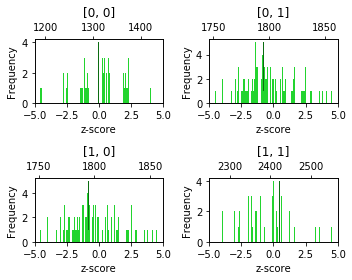

In [15]:
from face2face.visualization.plot_histogram_null_model import plot_null_model_subplots

plot_null_model_subplots(df, runs=100, label="Sex",shuffle_label=True, force_simple_graph=True, model="configuration_model")

## Apply null model with randomized identities
<a name="null_model"></a>

There is another null model you can apply on the dataset. The function is called "shuffle_label_z_score_mixing_matrix"
and you get the contact matrix with the z-scores as output. Except for the "shuffle_label" and the "force_simple_graph" parameter the parameters are the same.

In [16]:
from face2face.statistics.null_modell import shuffle_label_z_score_mixing_matrix
contact_matrix, abs_matrices = shuffle_label_z_score_mixing_matrix(df, runs=10,label="Education")

In [17]:
print(contact_matrix)

[[ 0.1938916835823688  1.045825033167593   0.9357343594004977
   1.1138647983852796  0.986135555758454  -0.9972337429718039
  -3.7762966867907357]
 [ 1.045825033167593  -0.1544566568553081 -0.6390096504226883
   0.5370510277519448  1.914460334151824  -2.4362284100952354
  -2.939448866770719 ]
 [ 0.9357343594004977 -0.6390096504226883  0.5981829716595235
   2.0012185463873404  1.1933755614270503 -1.9156764388751075
  -4.72402377010865  ]
 [ 1.1138647983852796  0.5370510277519448  2.0012185463873404
   1.172714745903653   2.1905267349115163 -1.1248359195396804
  -1.618854426800764 ]
 [ 0.986135555758454   1.914460334151824   1.1933755614270503
   2.1905267349115163  1.199087546959617   0.291504729551301
  -0.402919222792936 ]
 [-0.9972337429718039 -2.4362284100952354 -1.9156764388751075
  -1.1248359195396804  0.291504729551301  -1.1386885248915077
  -3.9478148044557386]
 [-3.7762966867907357 -2.939448866770719  -4.72402377010865
  -1.618854426800764  -0.402919222792936  -3.94781480445573

With this null model you can analyze if the correlations between topology and interactions are groupdependant or not.

## Plotting a heatmap from contact matrix
<a name="plot_heatmap"></a>

To plot the contact matrix you can use the "plot_cm_heatmap" function.

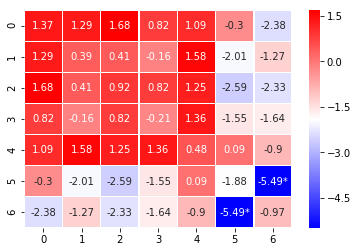

In [9]:
from face2face.visualization.plot_contact_matrix_heatmap import plot_cm_heatmap

plot_cm_heatmap(contact_matrix)

The heatmap visualization is based on the paper cited below:

Génois, Mathieu & Zens, Maria & Lechner, Clemens & Rammstedt, Beatrice & Strohmaier, Markus. (2019). Building connections: How scientists meet each other during a conference. 

The Heatmap shows the z-score between every value-attribute combination. Red fields indicate positive deviations, blue fields indicate negative deviations. Z-Scores which are labeled with a white * are significant under p < 0.01 (taking into account a Bonferroni Correction). Huge outliers are pretty rare, which shows that the value-attributes mix rather well in this case.